In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
from ema_workbench.em_framework.salib_samplers import get_SALib_problem

from SALib.analyze import sobol
from ema_workbench import (RealParameter, CategoricalParameter, IntegerParameter, ema_logging)

In [2]:
uncertainties = pd.read_csv("data/experimentssobol.csv").drop(columns = 'Unnamed: 0')
outcomes = pd.read_csv("data/outcomessobol.csv").drop(columns = 'Unnamed: 0')

The two dataframes were created by running the dike_model_simulation.py with the sobol sampling tecqhnique and 1000 scenarios per uncertainty parameter. So, we have **40000** scenarios here.

In [4]:
len(uncertainties)

40000

In [5]:
uncertainties.head()

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
0,0.0,150.46875,1.5,0.486816,208.28125,10.0,0.241699,217.96875,10.0,0.671387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Policy 0,dikesnet
1,46.0,150.46875,1.5,0.486816,208.28125,10.0,0.241699,217.96875,10.0,0.671387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Policy 0,dikesnet
2,0.0,197.96875,1.5,0.486816,208.28125,10.0,0.241699,217.96875,10.0,0.671387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,Policy 0,dikesnet
3,0.0,150.46875,1.0,0.486816,208.28125,10.0,0.241699,217.96875,10.0,0.671387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,Policy 0,dikesnet
4,0.0,150.46875,1.5,0.825684,208.28125,10.0,0.241699,217.96875,10.0,0.671387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,Policy 0,dikesnet


In [6]:
outcomes.head()

,All Costs,Expected Number of Deaths
0,1.948194e+08,0.434221
1,1.937970e+08,0.430982
2,1.948194e+08,0.434221
3,1.948194e+08,0.434221
4,1.401986e+08,0.332455


In [7]:
uncertainties.columns[:19]

Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2'],
      dtype='object')

Let's recreate the uncertainties in the way EMA Workbench recognises for the SOBOL to work:

In [10]:
uncertainties_for_sobol = \
[CategoricalParameter('discount rate 0', [0, 1, 2, 3]),
 CategoricalParameter('discount rate 1', [0, 1, 2, 3]), 
 CategoricalParameter('discount rate 2', [0, 1, 2, 3]), 
 IntegerParameter('A.0_ID flood wave shape', 0, 132), 
 RealParameter('A.1_Bmax', 30, 350), 
 RealParameter('A.1_pfail', 0, 1), 
 CategoricalParameter('A.1_Brate', [0, 1, 2]), 
 RealParameter('A.2_Bmax', 30, 350), 
 RealParameter('A.2_pfail', 0, 1), 
 CategoricalParameter('A.2_Brate', [0, 1, 2]), 
 RealParameter('A.3_Bmax', 30, 350), 
 RealParameter('A.3_pfail', 0, 1), 
 CategoricalParameter('A.3_Brate', [0, 1, 2]), 
 RealParameter('A.4_Bmax', 30, 350), 
 RealParameter('A.4_pfail', 0, 1), 
 CategoricalParameter('A.4_Brate', [0, 1, 2]), 
 RealParameter('A.5_Bmax', 30, 350), 
 RealParameter('A.5_pfail', 0, 1), 
 CategoricalParameter('A.5_Brate', [0, 1, 2])]

In [11]:
uncertainties_for_sobol

[CategoricalParameter('discount rate 0', [0, 1, 2, 3]),
 CategoricalParameter('discount rate 1', [0, 1, 2, 3]),
 CategoricalParameter('discount rate 2', [0, 1, 2, 3]),
 IntegerParameter('A.0_ID flood wave shape', 0, 132),
 RealParameter('A.1_Bmax', 30, 350),
 RealParameter('A.1_pfail', 0, 1),
 CategoricalParameter('A.1_Brate', [0, 1, 2]),
 RealParameter('A.2_Bmax', 30, 350),
 RealParameter('A.2_pfail', 0, 1),
 CategoricalParameter('A.2_Brate', [0, 1, 2]),
 RealParameter('A.3_Bmax', 30, 350),
 RealParameter('A.3_pfail', 0, 1),
 CategoricalParameter('A.3_Brate', [0, 1, 2]),
 RealParameter('A.4_Bmax', 30, 350),
 RealParameter('A.4_pfail', 0, 1),
 CategoricalParameter('A.4_Brate', [0, 1, 2]),
 RealParameter('A.5_Bmax', 30, 350),
 RealParameter('A.5_pfail', 0, 1),
 CategoricalParameter('A.5_Brate', [0, 1, 2])]

In [12]:
problem = get_SALib_problem(uncertainties_for_sobol)
print(problem)

{'num_vars': 19, 'names': ['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail', 'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate', 'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax', 'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1', 'discount rate 2'], 'bounds': [(0, 133), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (0, 4), (0, 4), (0, 4)]}


In [13]:
Si = sobol.analyze(problem, np.array(outcomes['All Costs']), calc_second_order=True, print_to_console=True)

Parameter S1 S1_conf ST ST_conf
A.0_ID flood wave shape -0.001070 0.009026 0.012247 0.003008
A.1_Bmax 0.006815 0.010450 0.013165 0.003546
A.1_Brate 0.000132 0.000666 0.000118 0.000101
A.1_pfail 0.689419 0.065535 0.739581 0.061910
A.2_Bmax -0.000890 0.001734 0.000520 0.000365
A.2_Brate 0.000148 0.000302 0.000067 0.000104
A.2_pfail 0.014178 0.014557 0.027253 0.004212
A.3_Bmax -0.000004 0.001587 0.000347 0.000217
A.3_Brate 0.000292 0.000623 0.000039 0.000043
A.3_pfail 0.229910 0.038100 0.273389 0.026000
A.4_Bmax 0.000580 0.000680 0.000081 0.000103
A.4_Brate 0.000065 0.000142 0.000001 0.000001
A.4_pfail -0.001547 0.004140 0.002259 0.000838
A.5_Bmax 0.000000 0.000000 0.000000 0.000000
A.5_Brate 0.000000 0.000000 0.000000 0.000000
A.5_pfail 0.010841 0.012112 0.025524 0.005125
discount rate 0 0.002007 0.003818 0.002352 0.000297
discount rate 1 0.002372 0.004613 0.002441 0.000279
discount rate 2 0.001565 0.004152 0.002400 0.000290

Parameter_1 Parameter_2 S2 S2_conf
A.0_ID flood wave shape A.1

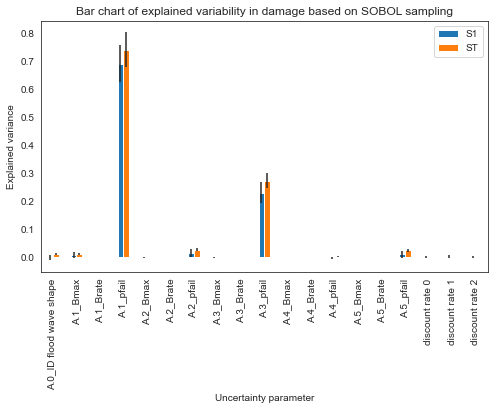

In [14]:
Si_filter = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
Si_df = pd.DataFrame(Si_filter, index=problem['names'])

sns.set_style('white')
fig, ax = plt.subplots(1)

indices = Si_df[['S1','ST']]
err = Si_df[['S1_conf','ST_conf']]

indices.plot.bar(yerr=err.values.T,ax=ax)
fig.set_size_inches(8,6)
fig.subplots_adjust(bottom=0.3)
plt.title('Bar chart of explained variability in damage based on SOBOL sampling')
plt.xlabel('Uncertainty parameter')
plt.ylabel('Explained variance')
plt.show()

Convergence of SOBOL:

In [15]:
Y = np.array(outcomes['All Costs'])

s_data = pd.DataFrame(index=problem['names'],
                      columns=np.arange(20,1000,50)*(2*problem['num_vars']+2))
for j in s_data.columns:
    scores = sobol.analyze(problem, Y[0:j], calc_second_order=True, print_to_console=False)
    s_data.loc[:,j] = scores['ST']

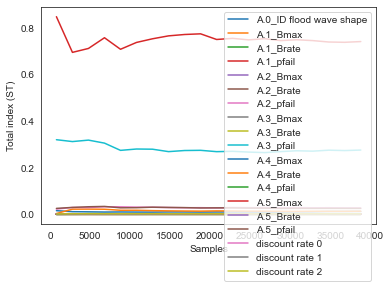

In [16]:
fig, ax = plt.subplots(1)

s_data.T.plot(ax=ax)
ax.set_xlabel('Samples')
ax.set_ylabel('Total index (ST)')
plt.show()

The indexes seem to get stabilized with the increasing samples!

## Extra Trees

In [17]:
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis.scenario_discovery_util import RuleInductionType

In [18]:
scores = feature_scoring.get_ex_feature_scores(uncertainties, np.array(outcomes['All Costs']),
                                      max_features=0.6, mode=RuleInductionType.REGRESSION)[0]
scores.head(10)

,1
0,
A.1_pfail,0.673812
A.3_pfail,0.223795
A.5_pfail,0.018724
A.2_pfail,0.015690
A.1_Bmax,0.013213
discount rate 0,0.007244
discount rate 1,0.004871
A.3_Bmax,0.004871
discount rate 2,0.004860


Extra trees also verifies the finding about A1 Pfail and A3 Pfail variables

In [19]:
#scores.head(10).to_csv('extra_trees_top10.csv')